# Actividad 9 - Guia 5: Filtros FIR

In [1]:
%matplotlib inline
#%matplotlib qt5

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import matplotlib
import scipy.signal as signal
import warnings
import mpld3
mpld3.enable_notebook()
warnings.filterwarnings("ignore")

## Requerimientos de entrada para el Filtro FIR

In [3]:
Fs = 4200 # Frecuencia de muestreo
Fa = 1200 # Frecuencia de rechazo/atenuacion
Fp = 1000 # Frecuencia de paso

#Riple admitido
rp = 20*np.log10(1.1)
print("Riple:",rp)

#Atenuacion requerida en la banda de rechazo
atenuacion_rechazo = -20*np.log10(1/400)
print("Atenuacion minima:", atenuacion_rechazo)

Riple: 0.8278537031645016
Atenuacion minima: 52.04119982655925


In [4]:
# Conversion de las frecuencias a Omega [rad/seg]
omega_s = 2*np.pi/Fs*Fa # Omega de rechazo
omega_p = 2*np.pi/Fs*Fp # Omega de paso
omega_c = (omega_p + omega_s)/2 # Omega de corte

deltaOmega = omega_s - omega_p #Ancho de la banda de transicion

A partir de estos datos, como calculo el orden del sistema? que ventana debo elegir?

## Construyo el filtro restringiendo a Ventana Rectangular

In [7]:
## Calculo la longitud de la ventana rectangular

#Segun la tabla de especificaciones de cada ventana para obtener la logntud hacemos:
N = np.int_(np.ceil(1.84*np.pi/deltaOmega + 1)) #longitud de la ventana
print("Longitud de la ventana rectangular:", N)

Longitud de la ventana rectangular: 21


Text(0, 0.5, 'Amplitud')

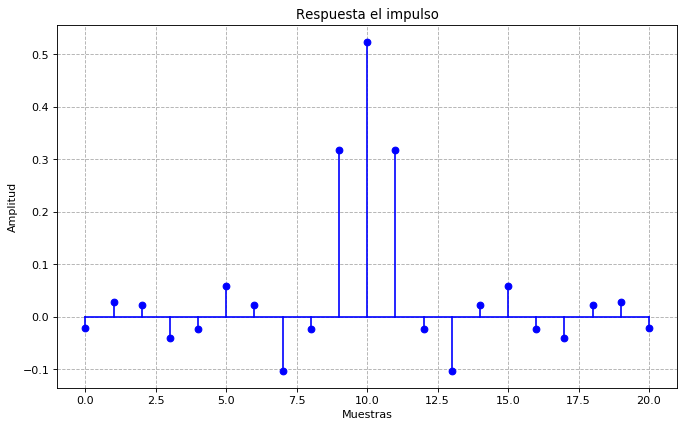

In [8]:
L = N-1 #orden del sistema
k = (N-1)/2 #desplazamiento en 'muestras'
n = np.array(range(N))

# Respuesta al impulso -> asumimos que usamos la ventana rectangular
h_rect = (omega_c/np.pi)*np.sinc(omega_c/np.pi*(n-k))

#Grafico Resp. Impulso
plt.figure(figsize=(10, 6), dpi=80)
#a entrada
(markersa, stemlinesa, baselinea) = plt.stem(n,h_rect)
plt.setp(baselinea, color="blue")
plt.setp(stemlinesa, color="blue")
plt.setp(markersa, color="blue")
plt.grid(linestyle='--', which="both")
plt.title("Respuesta el impulso")
plt.xlabel("Muestras")
plt.ylabel("Amplitud")
#b salida

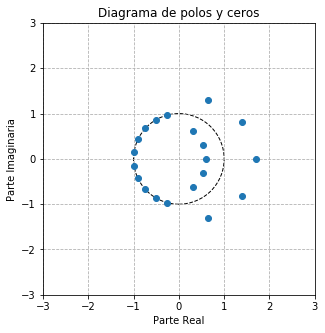

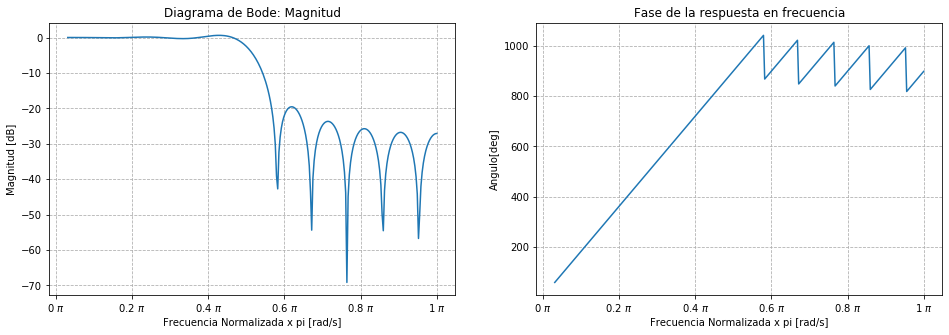

In [26]:
# Respuesta en frecuencia
#sistema
sys_rect = signal.dlti([h_rect], [1]) 

#frecuencia
Omega = np.arange(1/10,np.pi,0.01)

#respuesta en frecuencia
Omega_log, mag_dB, fase = signal.dbode(sys_rect, w=Omega)

#graficos
fig1, (ax1) = plt.subplots(1, 1, figsize=(16, 5))
#1 diagrama de polos y ceros
ax1.plot(sys_rect.zeros.real, sys_rect.zeros.imag, 'o')#ceros
ax1.plot(sys_rect.poles.real, sys_rect.poles.imag, 'x')#polos
circulo_unitario = matplotlib.patches.Circle((0,0), radius=1, fill=False, color='black', ls='dashed')
ax1.add_patch(circulo_unitario)
ax1.set_xlim(-3,3)#limite en parte real
ax1.set_ylim(-3,3)#limite en parte imaginaria
ax1.grid(linestyle='--')#grilla punteada
ax1.set_title("Diagrama de polos y ceros")
ax1.set_xlabel("Parte Real")
ax1.set_ylabel("Parte Imaginaria")
ax1.set_aspect('equal')
fig1.show()

fig2, (ax2, ax3) = plt.subplots(1, 2, figsize=(16, 5))
#2 magnitud
ax2.plot(Omega/np.pi,mag_dB)
ax2.set_title("Diagrama de Bode: Magnitud")
ax2.set_xlabel("Frecuencia Normalizada x pi [rad/s]")  
ax2.set_ylabel("Magnitud [dB]")
ax2.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax2.grid(linestyle='--', which="both")#grilla punteada para escala logaritmica

#3 fase
ax3.plot(Omega/np.pi,fase)
ax3.set_title("Fase de la respuesta en frecuencia")
#ax3.plot(0.5/np.pi,np.angle(signal.dfreqresp(sys,w=0.5)[1][0],deg=True),'x')
ax3.set_xlabel("Frecuencia Normalizada x pi [rad/s]")
ax3.set_ylabel("Angulo[deg]")
ax3.grid(linestyle='--', which="both")#grilla punteada
ax3.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
#ax3.xaxis.set_major_locator(tck.MultipleLocator(base=0.5))
fig2.show()



## Supongamos ahora que usamos la ventana que nos sugiere la tabla

De acuerdo a la tabla veo que el sistema de menor orden que cumple con la especificaciones es la ventana de Hamming

In [12]:
# Vuelvo a calcular la longitud de la ventana de acuerdo a la ventana requerida
N_hamm = np.int_(np.ceil(6.64*np.pi/deltaOmega + 1)) #longitud de la ventana
print(N_hamm)

71


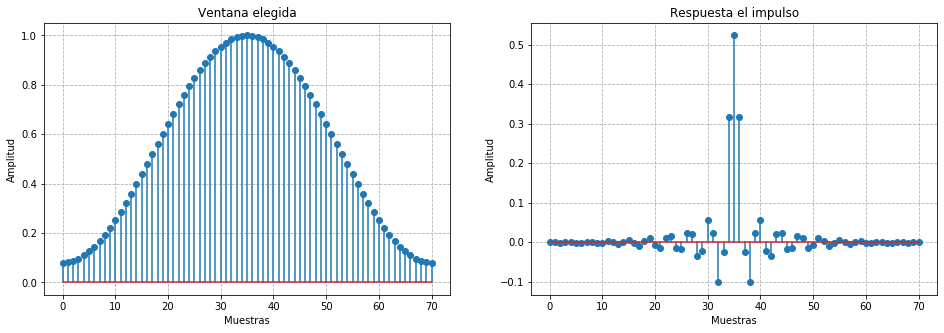

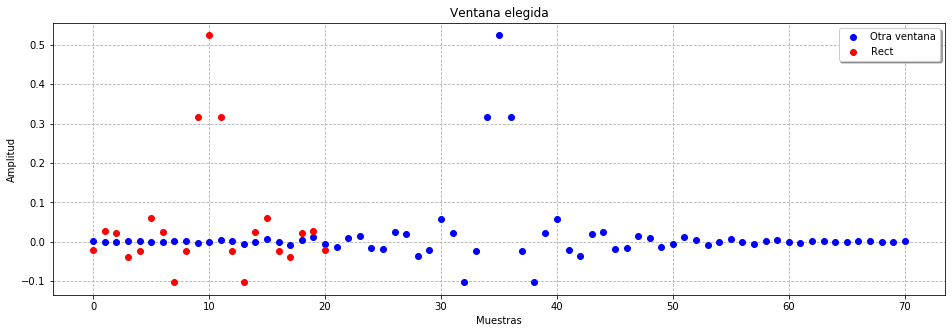

In [13]:
L_hamm = N_hamm-1 #orden del sistema
k_hamm = (N_hamm-1)/2
n_hamm = np.array(range(N_hamm))

# Determino la ventana a utilizar
window = signal.windows.hamming(N_hamm)

# Respuesta al impulso
h_wind = (omega_c/np.pi)*np.sinc(omega_c/np.pi*(n_hamm-k_hamm))*window

#Grafico  Ventana y Resp. Impulso

fig3, (ax4, ax5) = plt.subplots(1, 2, figsize=(16, 5))

ax4.stem(n_hamm,window)
ax4.set_title("Ventana elegida")
ax4.set_xlabel("Muestras")
ax4.set_ylabel("Amplitud")
ax4.grid(linestyle='--', which="both")#grilla punteada

(markersa, stemlinesa, baselinea) = ax5.stem(n_hamm,h_wind)
ax5.grid(linestyle='--', which="both")
ax5.set_title("Respuesta el impulso")
ax5.set_xlabel("Muestras")
ax5.set_ylabel("Amplitud")
ax5.grid(linestyle='--', which="both")#grilla punteada
fig3.show()

fig4, ax6 = plt.subplots(1, 1, figsize=(16, 5))
ax6.plot(n_hamm,h_wind,'ob',n,h_rect,'or')
ax6.set_title("Ventana elegida")
ax6.set_xlabel("Muestras")
ax6.set_ylabel("Amplitud")
ax6.legend(('Otra ventana', 'Rect'), loc='upper right', shadow=True)
ax6.grid(linestyle='--', which="both")#grilla punteada

### Respuesta en frecuencia del nuevo filtro

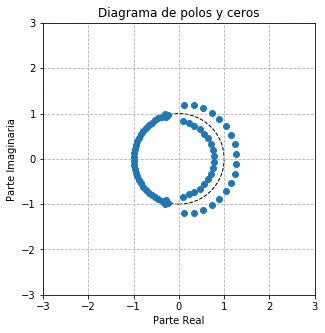

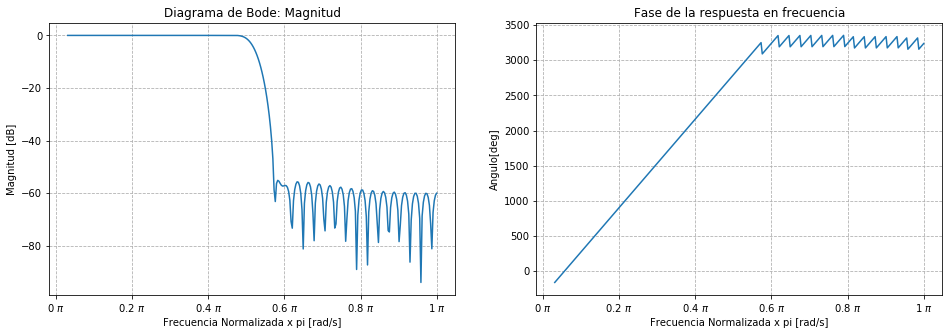

In [25]:
# Respuesta en frecuencia
#sistema
sys_wind = signal.dlti([h_wind], [1]) 

#frecuencia
Omega = np.arange(1/10,np.pi,0.01)
#f_Hz = Omega

#respuesta en frecuencia
Omega_wind_log, mag_wind_dB, fase_wind = signal.dbode(sys_wind, w=Omega)

#graficos

fig5, (ax7) = plt.subplots(1, 1, figsize=(16, 5))
#1 diagrama de polos y ceros
ax7.plot(sys_wind.zeros.real, sys_wind.zeros.imag, 'o')#ceros
ax7.plot(sys_wind.poles.real, sys_wind.poles.imag, 'x')#polos
circulo_unitario = matplotlib.patches.Circle((0,0), radius=1, fill=False, color='black', ls='dashed')
ax7.add_patch(circulo_unitario)
ax7.set_xlim(-3,3)#limite en parte real
ax7.set_ylim(-3,3)#limite en parte imaginaria
ax7.grid(linestyle='--')#grilla punteada
ax7.set_title("Diagrama de polos y ceros")
ax7.set_xlabel("Parte Real")
ax7.set_ylabel("Parte Imaginaria")
ax7.set_aspect('equal')
fig5.show()

fig6, (ax8, ax9) = plt.subplots(1, 2, figsize=(16, 5))
#2 magnitud
ax8.plot(Omega/np.pi,mag_wind_dB)
ax8.set_title("Diagrama de Bode: Magnitud")
ax8.set_xlabel("Frecuencia Normalizada x pi [rad/s]")  
ax8.set_ylabel("Magnitud [dB]")
ax8.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax8.grid(linestyle='--', which="both")#grilla punteada para escala logaritmica

#3 fase
ax9.plot(Omega/np.pi,fase_wind)
ax9.set_title("Fase de la respuesta en frecuencia")
#a3.plot(0.5/np.pi,np.angle(signal.dfreqresp(sys,w=0.5)[1][0],deg=True),'x')
ax9.set_xlabel("Frecuencia Normalizada x pi [rad/s]")
ax9.set_ylabel("Angulo[deg]")
ax9.grid(linestyle='--', which="both")#grilla punteada
ax9.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
#ax3.xaxis.set_major_locator(tck.MultipleLocator(base=0.5))
fig6.show()



### Comparacion entre respuestas en frecuencia (magnitud)

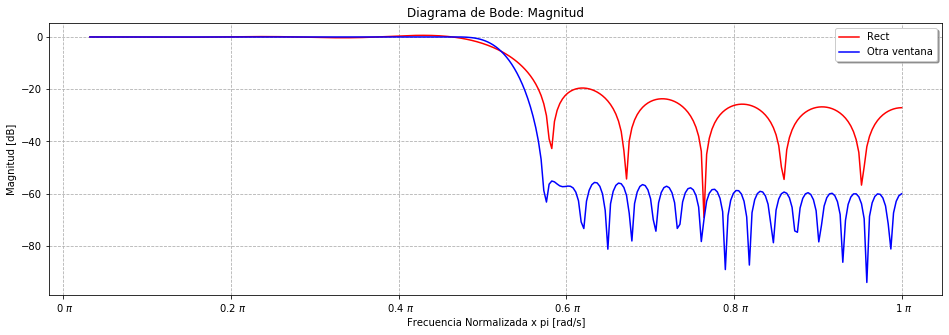

In [24]:
fig7, ax10 = plt.subplots(1, 1, figsize=(16, 5))

ax10.plot(Omega/np.pi,mag_dB,'r',Omega/np.pi,mag_wind_dB,'b')
ax10.legend(('Rect','Otra ventana'), loc='upper right', shadow=True)
ax10.set_title("Diagrama de Bode: Magnitud")
ax10.set_xlabel("Frecuencia Normalizada x pi [rad/s]")  
ax10.set_ylabel("Magnitud [dB]")
ax10.xaxis.set_major_formatter(tck.FormatStrFormatter(' %g $\pi$'))
ax10.grid(linestyle='--', which="both")#grilla punteada para escala logaritmica

fig7.show()

### Como hago para hacer los mismo graficos pero con el eje de las fecuencias en Hz?


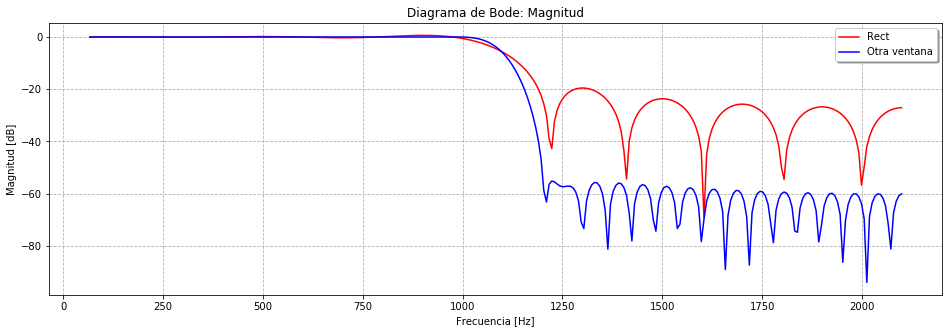

In [16]:
f_Hz = Omega*Fs/(2*np.pi)

fig8, ax11 = plt.subplots(1, 1, figsize=(16, 5))

ax11.plot(f_Hz,mag_dB,'r',f_Hz,mag_wind_dB,'b')
ax11.legend(('Rect','Otra ventana'), loc='upper right', shadow=True)
ax11.set_title("Diagrama de Bode: Magnitud")
ax11.set_xlabel("Frecuencia [Hz]")  
ax11.set_ylabel("Magnitud [dB]")
#ax10.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax11.grid(linestyle='--', which="both")#grilla punteada para escala logaritmica

fig8.show()